In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("metric.xlsx")

In [3]:
x = data["metric"].values

In [76]:
p = stats.lognorm.fit(x)
law = stats.lognorm(*p)

/home/jlandercy/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


In [77]:
xlin = np.linspace(x.min(), x.max(), 200)

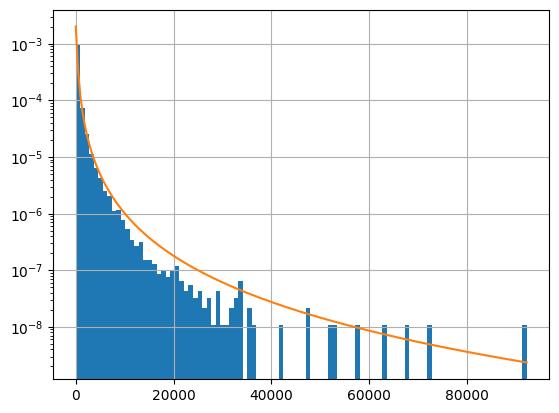

In [78]:
fig, axe = plt.subplots()
axe.hist(x, bins=100, density=1.)
axe.plot(xlin, law.pdf(xlin))
axe.set_yscale("log")
axe.grid()

In [79]:
ecdf = stats.ecdf(x)

In [80]:
p = np.linspace(0, 1, ecdf.cdf.quantiles.size)

In [81]:
q = law.ppf(p)
q

array([-1.91252200e-01,  1.02515611e-02,  9.08676872e-02, ...,
        4.71065532e+04,  6.59526692e+04,             inf])

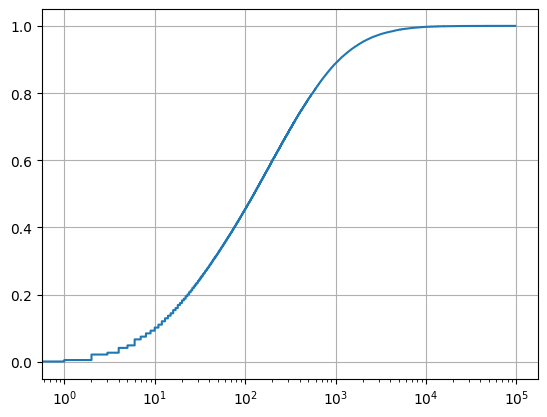

In [82]:
fig, axe = plt.subplots()
ecdf.cdf.plot(axe)
axe.set_xscale("log")
axe.grid()

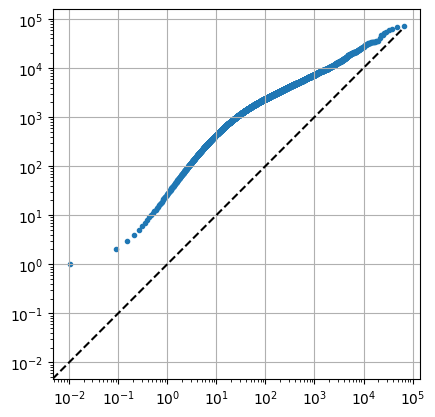

In [83]:
fig, axe = plt.subplots()
axe.scatter(q, ecdf.cdf.quantiles, marker=".")
axe.plot(q, q, "--", color="black")
axe.set_xscale("log")
axe.set_yscale("log")
axe.set_aspect("equal")
axe.grid()